In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
# load the z-scored data 
data = np.load('data_zscored.npy')

In [4]:
data.shape

(384, 2430)

### takeing binned spike count 

In [5]:
def bin_data(data, bin_size):
    data = data.reshape(data.shape[0], -1, bin_size)
    data = np.sum(data, axis=2)
    return data 

In [6]:
data_bin_10 = bin_data(data, 10)
data_bin_10.shape

(384, 243)

In [7]:
np.save('data_bin_10', data_bin_10)

In [8]:
data_bin_5 = bin_data(data, 5)
data_bin_5.shape

(384, 486)

In [9]:
np.save('data_bin_5', data_bin_5)

### Gaussian smoothing

In [13]:
def Gaussian_smooth_trial(trial, a, tau):
    t_list = np.arange(len(trial))
    g = np.exp(-a*(t_list-tau)**2)
    Sg = np.multiply(trial, g)
    return g, Sg

Text(0.5,1,'Gaussian smooth with a=0.1')

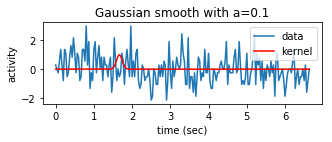

In [44]:
plt.figure(figsize=(5,1.5))

trial = data[0,:]
time = np.arange(0,81,1/30)[:200]
g, Sg = Gaussian_smooth_trial(trial, 0.1, 50)
plt.plot(time[:200], trial[:200], label='data')
plt.plot(time[:200], g[:200], color='red',label='kernel')
plt.xlabel('time (sec)')
plt.ylabel('activity')
plt.legend()
plt.title('Gaussian smooth with a=0.1')

In [36]:
def Gaussian_smooth(data, a):
    Gau_trial = 0*data 
    t_list = np.arange(data.shape[1])
    
    for i_neuron in range(data.shape[0]):
        for tau in range(data.shape[1]):
            g = np.exp(-a*(t_list-tau)**2)
            Sg = np.multiply(data[i_neuron,:], g)
            Gau_trial[i_neuron, tau] = np.sum(Sg)
            
    return Gau_trial 

In [48]:
Gau_trial = Gaussian_smooth(data, a=0.05)

In [49]:
Gau_trial.shape

(384, 2430)

In [50]:
np.save('Gau_smoothed_005', Gau_trial)